# **Customer Segmentation Analyst**


# 1. Latar Belakang
Sebagai jantung kehidupan sehari-hari, **supermarket memiliki peran krusial dalam memenuhi aspirasi konsumen.** <br>Untuk terus memanjakan pelanggan setia dan menarik minat yang lebih luas.<br>**Sebagai Data Scientist** kita bertugas membuat Sebuah supermarket berkomitmen untuk memahami secara mendalam preferensi dan perilaku belanja mereka. Dengan demikian, pengelola supermarket dapat merancang pengalaman belanja yang sesuai, memenuhi ekspektasi, dan menciptakan loyalitas yang mendalam.

In [1]:
#Importing Modul kebutuha
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (16, 6)
sns.set(style="darkgrid")
sns.set_palette("pastel")


## 1.1 Pernyataan Masalah
**Memahami pola belanja: Mengidentifikasi produk apa saja yang sering dibeli, waktu pembelian, dan jumlah pembelian.**,<br>
**Mengetahui faktor yang mempengaruhi keputusan pembelian: Memahami faktor-faktor seperti harga, merek, kualitas produk, promosi, dan kenyamanan belanja yang mempengaruhi pilihan konsumen.** <br>
**Mengidentifikasi segmen pasar: Membagi pelanggan menjadi kelompok-kelompok berdasarkan karakteristik dan preferensi yang berbeda untuk dapat memberikan penawaran yang lebih personal**<br>
**Meningkatkan pengalaman belanja: Menyarankan produk yang sesuai dengan memahami apa yang dibutuhkan pelanggan.**<br>


<h2 style="font-size:100%"> People:</h2>

| # | Feature | Description
| --- | --- | --- 
| 1 | ID | Customer's unique identifier
| 2 | Year_Birth | Customer's birth year
| 3 | Education | Customer's education level
| 4 | Marital_Status | Customer's marital status
| 5 | Income | Customer's yearly household income
| 6 | Kidhome | Number of children in customer's household
| 7 | Teenhome | Number of teenagers in customer's household
| 8 | Dt_Customer | Date of customer's enrollment with the company
| 9 | Recency | Number of days since customer's last purchase
| 10 | Complain | 1 if the customer complained in the last 2 years, 0 otherwise

<h2 style="font-size:100%"> Products:</h2>

| # | Feature | Description
| --- | --- | --- 
| 11 | MntWines | Amount spent on wine in last 2 years
| 12 | MntFruits | Amount spent on fruits in last 2 years
| 13 | MntMeatProducts | Amount spent on meat in last 2 years
| 14 | MntFishProducts | Amount spent on fish in last 2 years
| 15 | MntSweetProducts | Amount spent on sweets in last 2 years
| 16 | MntGoldProds | Amount spent on gold in last 2 years

<h2 style="font-size:100%"> Promotion:</h2>

| # | Feature | Description
| --- | --- | --- 
| 17 | NumDealsPurchases | Number of purchases made with a discount
| 18 | AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
| 19 | AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
| 20 | AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
| 21 | AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
| 22 | AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
| 23 | Response | 1 if customer accepted the offer in the last campaign, 0 otherwise

<h2 style="font-size:100%"> Place:</h2>

| # | Feature | Description
| --- | --- | --- 
| 24 | NumWebPurchases | Number of purchases made through the company’s website
| 25 | NumCatalogPurchases | Number of purchases made using a catalogue
| 26 | NumStorePurchases | Number of purchases made directly in stores
| 27 | NumWebVisitsMonth | Number of visits to company’s website in the last month

<h2 style="font-size:100%"> Uncategorized:</h2>

| # | Feature | Description
| --- | --- | --- 
| 28 | Z_CostContact | -
| 29 | Z_Revenue | -

# 2. Ringkasan Data


### 2.1 Data Set

In [2]:
scm = pd.read_csv('Supermarket Customers.csv', delimiter ="\t")
df = scm.copy()
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### 2.2 Informasi Data

In [3]:
print(f'Jumlah baris dan kolom di dataset Supermarket Costumers adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset Supermarket Costumers adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds  

### 2.3 Deskripsi Data Numerik

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 2.4 Categorical Description

In [5]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### 2.5 Pengujian Data Awal
Dapat disimpulkan bahwa :
- Dari deskripsi numerik, kita melihat bahwa kolom tahun lahir dan pendapatan mengandung outlier ekstrem yang harus kita tangani.
- Kolom `Z_CostContact` dan `Z_Revenue` hanya berisi satu nilai, oleh karena itu sepertinya bisa dihapus. Kemudian, kolom `ID` tidak akan membantu kita dalam analisis dan harus dihapus juga.
Dan Juga kolom `Income` mengandung sejumlah kecil nilai yang hilang.

# 3. EDA

In [6]:
#Shortcut untuk menampilkan visualisasi

def set_labels(x="", y="", title="", axis=None):
  if axis:
    axis.set_xlabel(x);
    axis.set_ylabel(y);
    axis.set_title(title);
  else:
    plt.title(title);
    plt.xlabel(x);
    plt.ylabel(y);

## Shortcut Display via Loop Per column
# for column in dfCopy.columns:
#     # 1. Visualisasi Distribusi parsing column
#     plt.figure(figsize=(10, 5))
#     sns.histplot(dfCopy[column], bins=20, kde=True)
#     set_labels(x=column, y="Frequency", title=f"Distribusi data {column}")
#     plt.show()

### 3.1 Pelanggan

#### 3.1.1 Bagaimana distribusi tahun lahir dari pelanggan

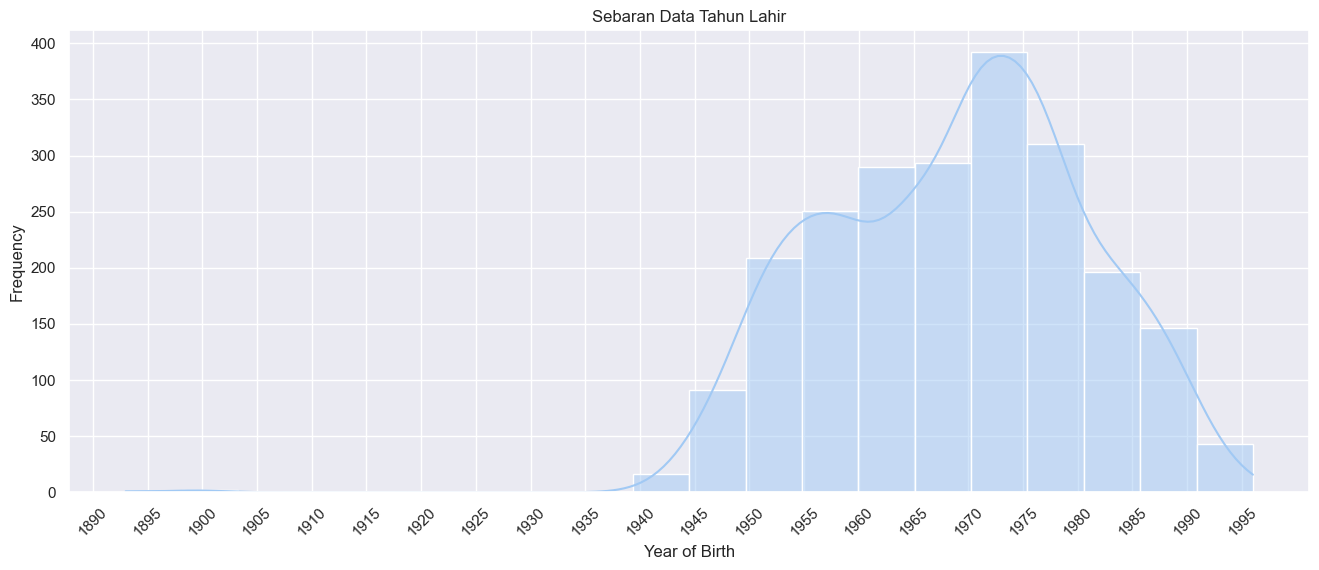

In [7]:
set_labels(x="Year of Birth", y="Frequency", title="Sebaran Data Tahun Lahir")
plt.xticks(list(range(1830,2000,5)), rotation=45)
plt.grid(True)
sns.histplot(df['Year_Birth'], bins=20, kde=True)
plt.show()

Sebagian besar pelanggan antara tahun 1970 hingga 1978,
Orang yang lebih tua tampaknya memiliki frequensi lebih tinggi dibandingkan kelahiran yang lebih muda.
Kemudian Outlier juga ditemukan.

#### 3.1.2 Mayoritas data kategorikal Pendidikan

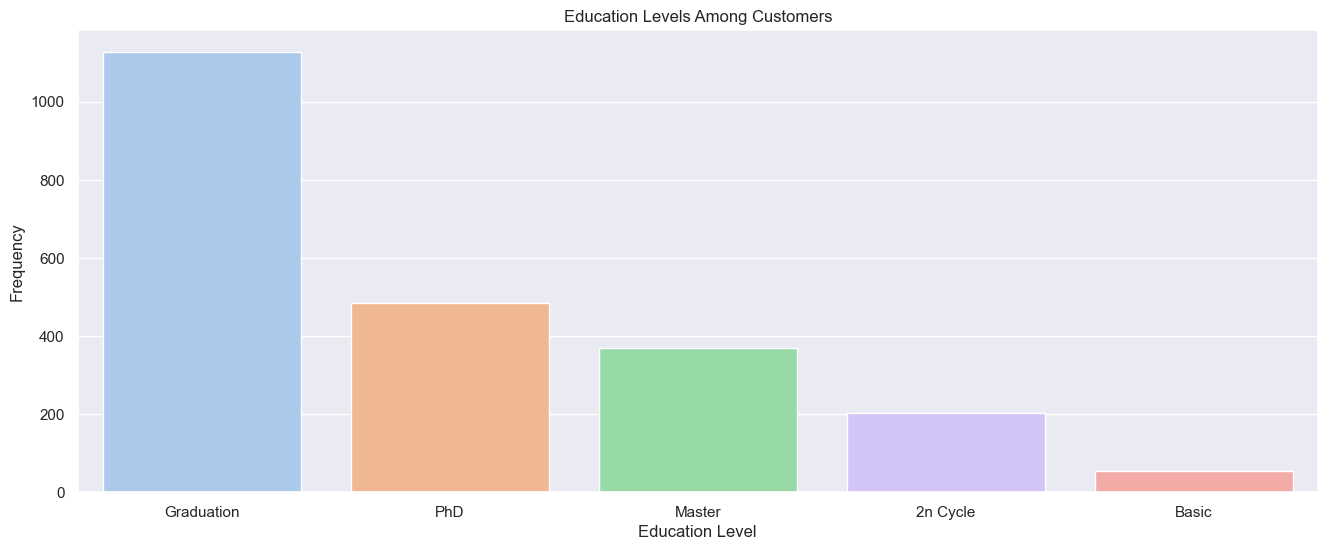

In [8]:
set_labels(x="Education Level", y="Frequency", title="Education Levels Among Customers")
sns.countplot(x=df.Education, order = df.Education.value_counts().index, hue=df.Education, legend=False)
plt.show()

#### 3.1.3 Mayoritas data kategori pernikahan

In [9]:
dfMar = df.Marital_Status.value_counts()
dfMar

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Terlihat beberapa kategori yang tidak masuk akal. `Married` `Together` dapat diartikan berpasangan. `Single` `Divorce` `Widow` `Alone` diasumsikan sebagai lajang, sementara `Absurd` dan `YOLO` dapat diabaikan karena tidak dapat di interpretasi dari kedua kategori sebelumnya.

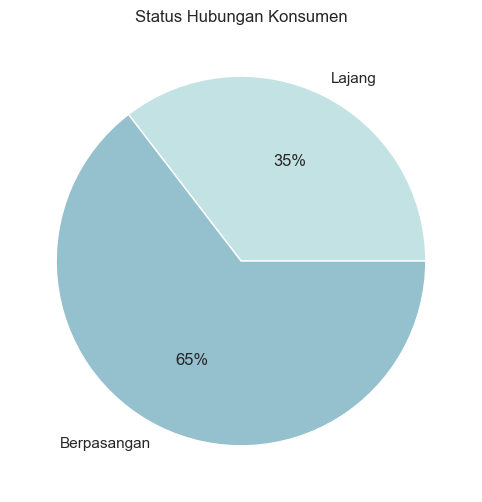

In [10]:
single = dfMar[['Single', 'Divorced', 'Widow', 'Alone']].sum()
relationship =  dfMar[['Married', 'Together']].sum()

set_labels(title="Status Hubungan Konsumen")
color = sns.color_palette('ch:start=.2,rot=-.3')
plt.pie([single, relationship], labels = ['Lajang', 'Berpasangan'], autopct='%.0f%%', colors=color)
plt.show()

Dari pie chart terlihat mayoritas pelanggan berstatus berpasangan 65%

#### 3.1.4 Mayoritas pendapatan pelanggan

Dapat diamati outlier terlihat , ini dapat diabaikan dulu sementara dengan cara menganalisa data lebih dalam


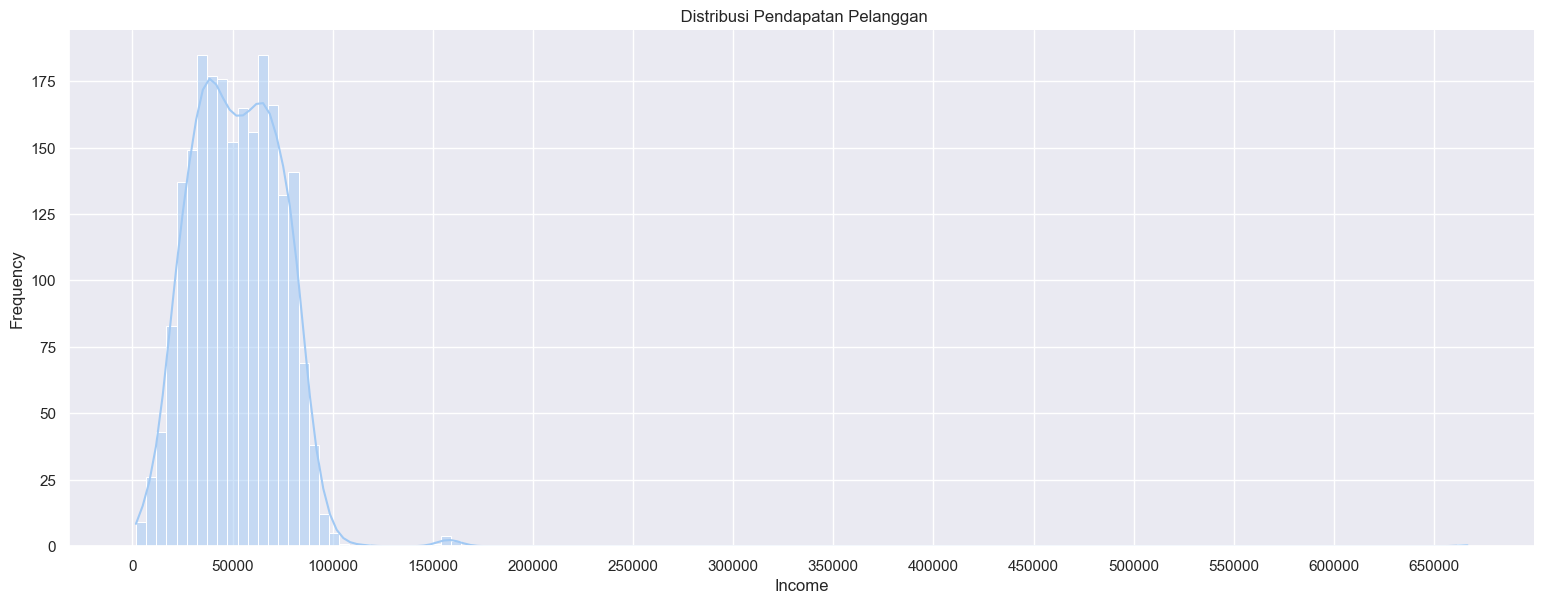

In [11]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6)
plt.xticks(list(range(0,700000,50000)))
set_labels(x="Income", y="Frequency", title=" Distribusi Pendapatan Pelanggan")
print('Dapat diamati outlier terlihat , ini dapat diabaikan dulu sementara dengan cara menganalisa data lebih dalam')

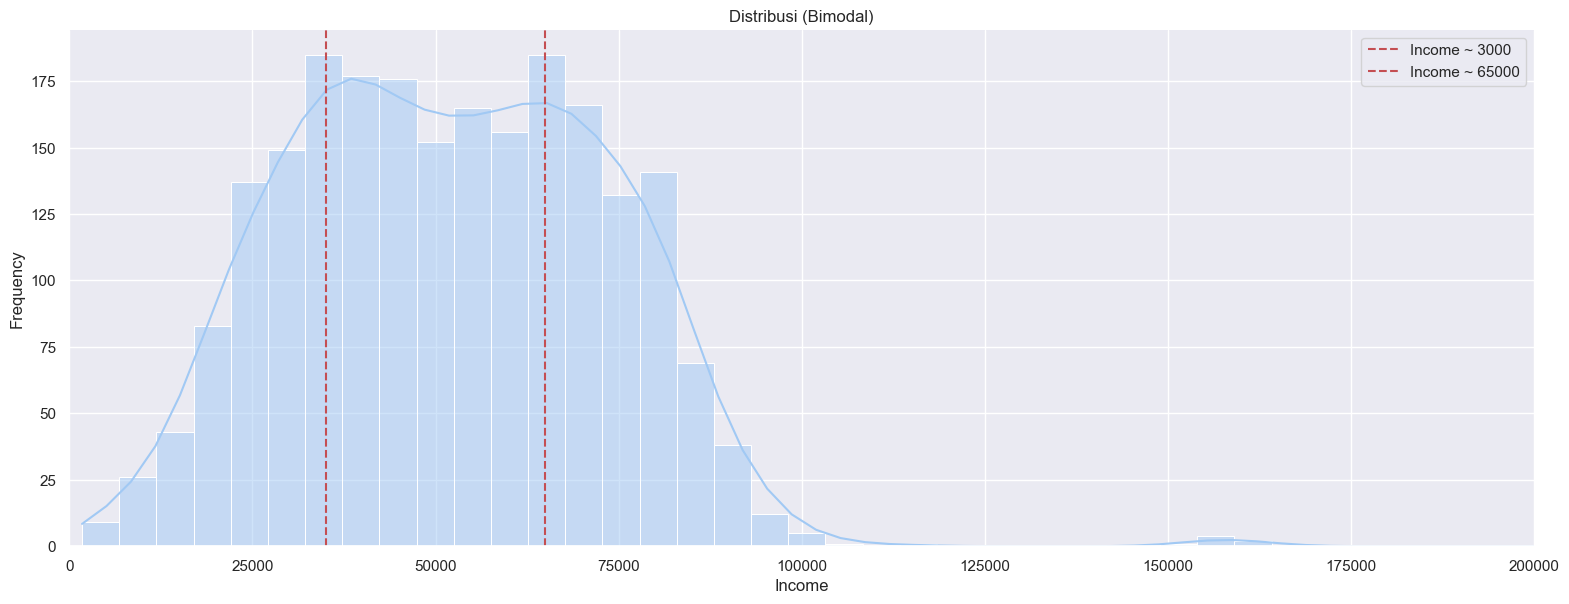

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
Distribusi pendapatan bersifat bimodal dengan pendapatan tahunan yang paling umum sekitar 35.000 dan 65.000.


In [12]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6)
plt.xlim([0, 200000])
set_labels(x="Income", y="Frequency", title=" Distribusi Pendapatan Pelanggan")
set_labels(x='Income', y='Frequency', title='Distribusi (Bimodal)')
plt.axvline(x=35000,color='r', linestyle='--', label='Income ~ 3000')
plt.axvline(x=65000,color='r', linestyle='--', label='Income ~ 65000')
plt.legend()
plt.show()
print(df['Income'].describe())
print('Distribusi pendapatan bersifat bimodal dengan pendapatan tahunan yang paling umum sekitar 35.000 dan 65.000.')


#### 3.1.5 Mayoritas Jumlah Anak dan Remaja

Sebagian besar pelanggan tidak memiliki remaja atau anak-anak. Namun, jumlah pelanggan yang memiliki satu remaja lebih banyak daripada pelanggan yang memiliki satu anak.


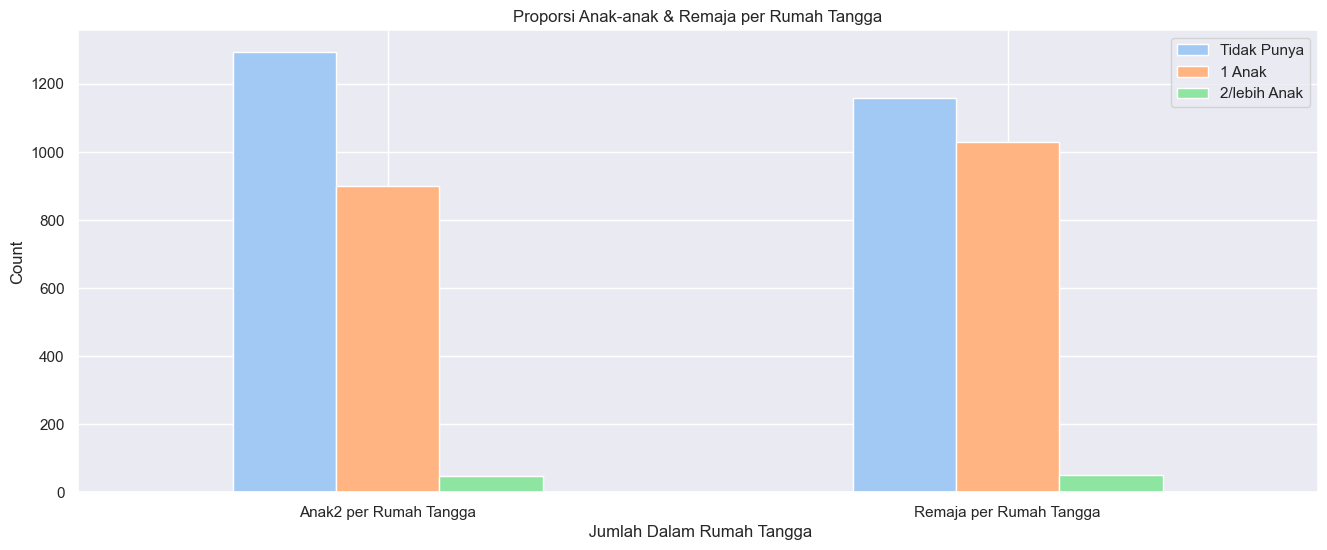

In [13]:
# Menghitung jumlah anak-anak dan remaja di rumah tangga
kid = df.Kidhome.value_counts()
teen = df.Teenhome.value_counts()

# Membuat DataFrame untuk counts
counts = pd.DataFrame({
    'Anak2 per Rumah Tangga': [kid[0], kid[1], kid[2]],  # Jumlah untuk kategori Kids Home
    'Remaja per Rumah Tangga': [teen[0], teen[1], teen[2]]  # Jumlah untuk kategori Teens Home
}, index=['Tidak Punya', '1 Anak', '2/lebih Anak']).T

# Membuat grafik batang
counts.plot(kind="bar", rot=0)
set_labels(x=" Jumlah Dalam Rumah Tangga", y="Count", title="Proporsi Anak-anak & Remaja per Rumah Tangga")
print('Sebagian besar pelanggan tidak memiliki remaja atau anak-anak. Namun, jumlah pelanggan yang memiliki satu remaja lebih banyak daripada pelanggan yang memiliki satu anak.')

#### 3.1.6 Sejak kapan supermarket mulai mendapatkan pelanggannya?

"Tanggal pendaftaran terdistribusi normal, dengan sebagian besar pelanggan terdaftar antara Juli 2012 dan Juli 2014."


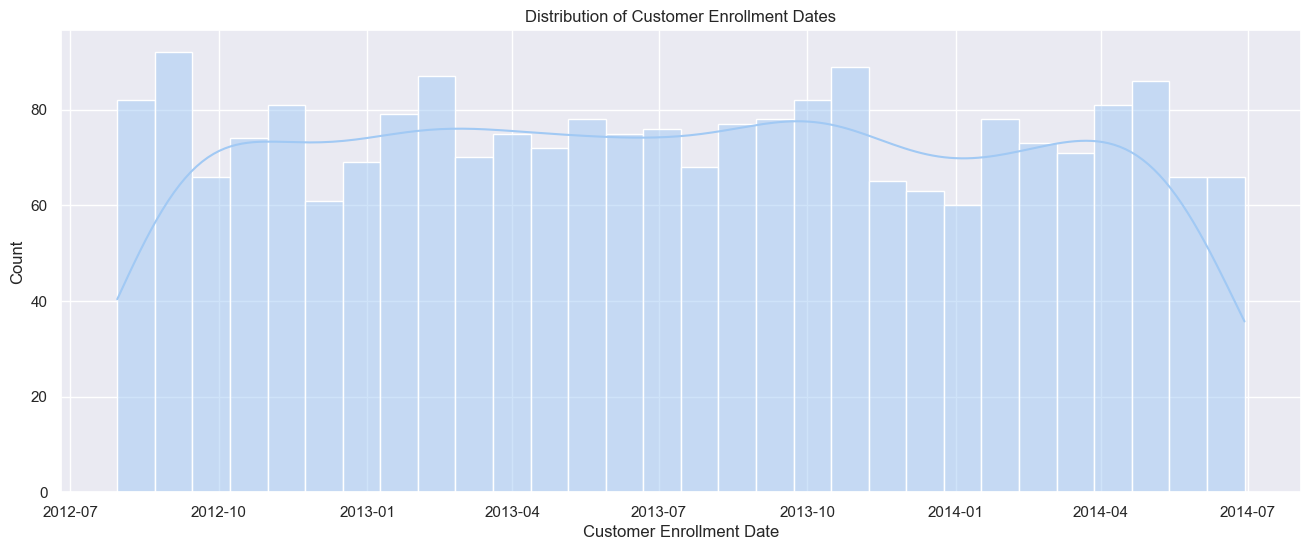

In [36]:
# # Mengonversi kolom 'Dt_Customer' ke tipe datetime dengan format yang benar
# df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y' )

set_labels(x="Customer Enrollment Date", y="Count", title="Distribution of Customer Enrollment Dates")
sns.histplot(pd.to_datetime(df['Dt_Customer']), kde=True, bins= 30)
print('"Tanggal pendaftaran terdistribusi normal, dengan sebagian besar pelanggan terdaftar antara Juli 2012 dan Juli 2014."')

### 3.1.7 Jumlah hari yang paling umum ditemukan pada antara pembelian terakhir pelanggan

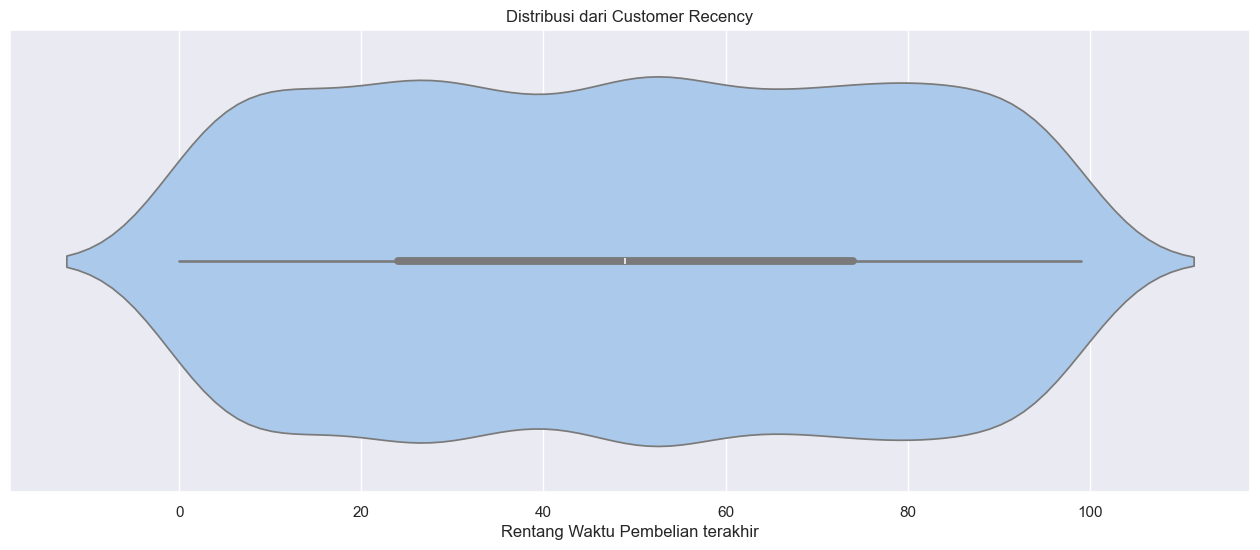

Recency Konsumen terlihat terdistribusi Normal. Interval hari terlihat persis sama.


In [15]:
set_labels(x="Rentang Waktu Pembelian terakhir", title="Distribusi dari Customer Recency")
sns.violinplot(x=df['Recency'])
plt.show()
print('Recency Konsumen terlihat terdistribusi Normal. Interval hari terlihat persis sama.')

### 3.1.8 Persentasi dari Konsumen yang Complain

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [17]:
counts = df.Complain.map({0:"No", 1:"Yes"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Persentasi Komplain Konsumen dalam 2 tahun terakhir', title_x=0.5)


## 3.2 Produk

### 3.2.1 Produk yang paling banyak terjual

In [18]:
avg = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Average Amount Spent on Product Categories', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))


50% dari rata-rata konsumen membeli wines, kemudian product Meat 27%.

### 3.2.2 Hubungan Pendidikan dan Pola Konsumtif Konsumen

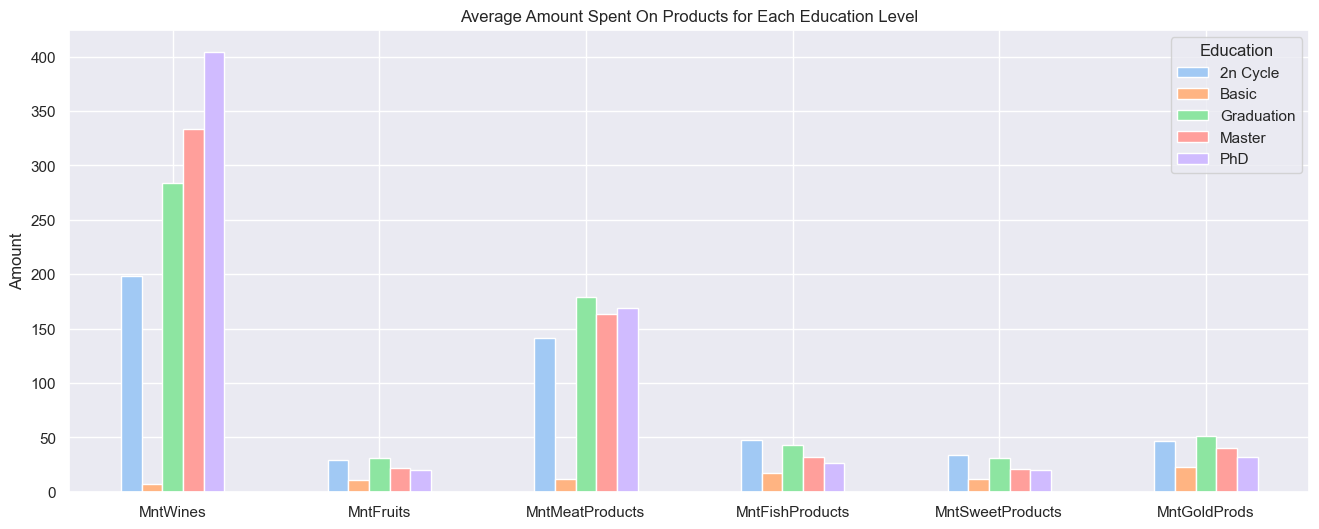

In [19]:
cat = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean().T

cat.plot(kind='bar', rot=0)
set_labels(y="Amount", title="Average Amount Spent On Products for Each Education Level")

Dari Visualisasi menunjukkan bahwa pemegang gelar PhD menghabiskan paling banyak untuk anggur. Untuk buah-buahan, emas, dan produk daging, individu yang berpendidikan "sarjana" menghabiskan paling banyak. Sedangkan individu dengan pendidikan "2n cycle" menghabiskan paling banyak untuk ikan dan permen

### 3.2.3 Pengaruh Complain dan pola belanja

In [20]:
cat = df.copy()
cat.Complain = cat.Complain.map({0:"No", 1:"Yes"})
cat = round(cat.groupby('Complain')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean().T.unstack().reset_index(level=1, name='mean') \
          .rename(columns={'level_1':'category'}).reset_index(), 2)

fig = px.bar(data_frame=cat, y='mean', x='Complain',
             text=cat['mean'].map(lambda x: str(x)),
             color_discrete_sequence=px.colors.qualitative.Pastel,
             color='category')

fig.update_layout(title="Complaining Vs Non-complaining Individu", title_x=0.5)

Seperti yang diharapkan, orang-orang yang mengeluh tentang layanan tingkat pembeliannya lebih sedikit.
Rata-rata pengeluaran untuk pelanggan yang mengeluh jauh lebih rendah di semua kategori produk.

## 3.3 Promosi

### 3.3.1 Distribusi pembelian dengan diskon di antara berbagai tingkat pendidikan

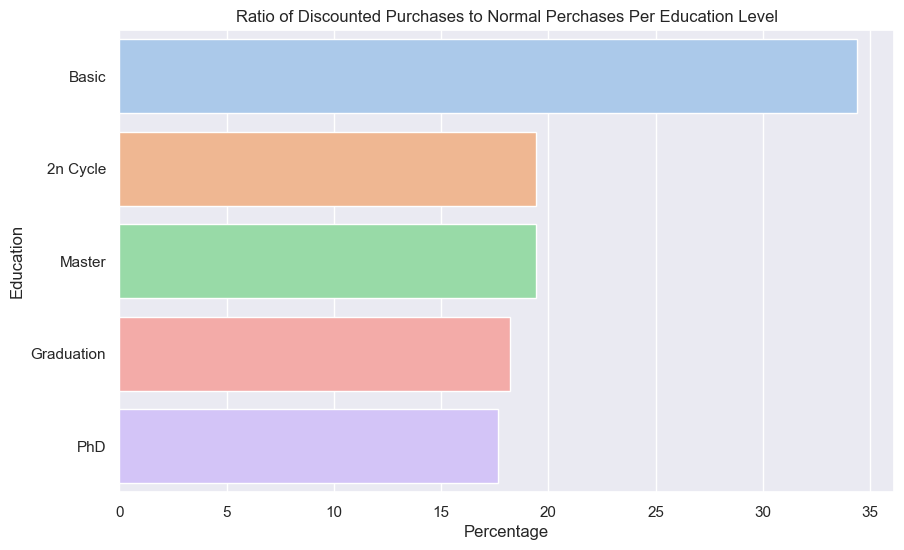

In [21]:
discounted_purchases = df.groupby('Education').NumDealsPurchases.sum()
total_purchases = df.groupby('Education')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum(axis=1)

percentage = round(discounted_purchases * 100 / total_purchases, 2).sort_values(ascending=False)
percentage_df = percentage.reset_index()
percentage_df.columns = ['Education', 'Percentage']
# Visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, y='Education', x='Percentage', hue='Education')

set_labels(x="Percentage", y="Education", title="Ratio of Discounted Purchases to Normal Perchases Per Education Level")

Terlihat bahwa individu dengan tingkat pendidikan terendah memiliki persentase pembelian dengan diskon yang jauh lebih tinggi.
Persentase pembelian dengan diskon terendah dilakukan oleh pemegang gelar PhD.

### 3.3.2 Kampanye yang paling sukses di antara pelanggan

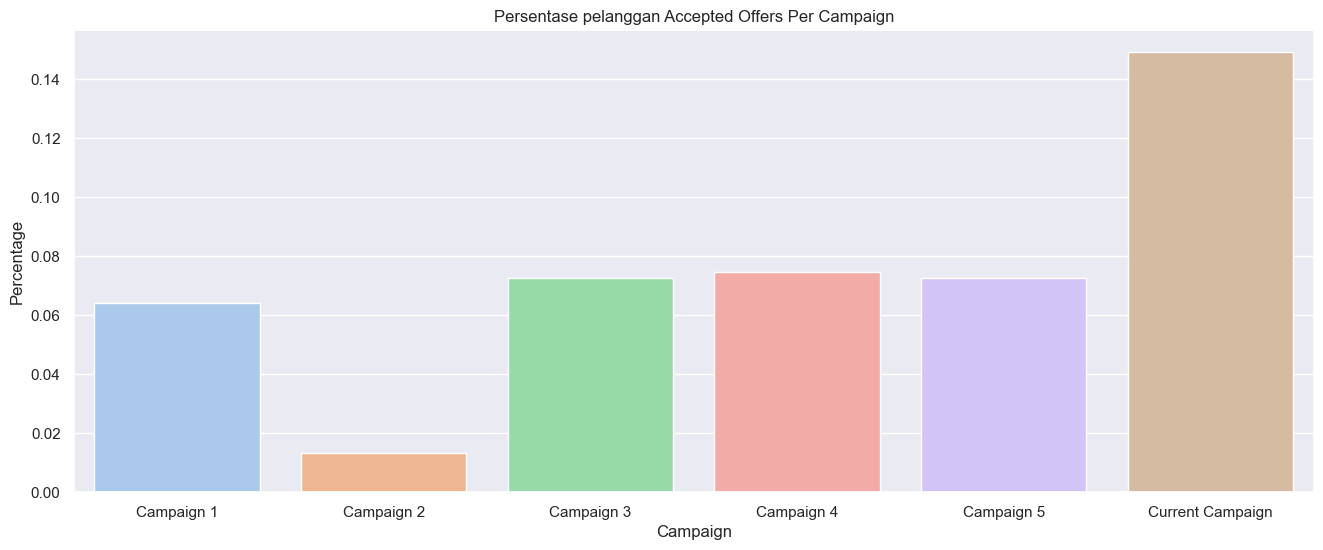

In [41]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0) / len(df)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Current Campaign']

set_labels(y="Percentage", x="Campaign", title="Persentase pelanggan Accepted Offers Per Campaign")
sns.barplot(y=aCmp.values, x=names, hue = names)
plt.show()


Dapat kita amati bahwa permintaan terhadap penawaran kampanye sangat rendah di kalangan pelanggan, karena kampanye yang paling sukses hanya menarik sekitar 15% dari pelanggan.

### 3.3.3 Persentase penawaran yang diterima per kampanye dari semua penawaran yang diterima

In [42]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Current Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

Kampanye berjalaan saat ini memiliki jauh lebih banyak penawaran yang diterima, dengan sekitar 33,4% dari semua penawaran yang diterima. Ini menjadikannya kampanye yang paling sukses sejauh ini.

### 3.3.4 Outlet yang memiliki jumlah pembelian paling banyak

In [49]:

# Menghitung total pembelian berdasarkan metode
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = pd.DataFrame({
    'Method': columns_new,
    'Total': df[columns].sum().values
})

# Membuat treemap
fig = px.treemap(total, path=['Method'], values='Total',
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                )

# Mengatur layout
fig.update_layout(margin=dict(t=25, l=25, r=25, b=25),
                  title_text='Transaksi yang dilakukan berdasarkan Metode',
                  title_x=0.5,
                  title_y=0.96)

# Menampilkan plot
fig.show()

Dapat kita lihat bahwa sebagian besar pembelian dilakukan di toko, diikuti oleh pembelian melalui web dengan 9150 transaksi. Pembelian melalui katalog merupakan yang paling sedikit.

In [50]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# KESIMPULAN


<h2 style="font-size:100%"> EXPLANATORY DATA ANALISIS:</h2>

| # | Feature | Description
| --- | --- | --- 
| 1 | MntWines | Adalah produk yang paling banyak di beli
| 2 | Discount | Orang dengan pendididkan lebih rendah cenderung membeli barang dengan promosi discount
| 3 | Purchase | Pembelian terbanyak berdasarkan transaksi adalah di toko
| 4 | Usia | Sebagian besar pelanggan antara tahun 1970 hingga 1978,
| 5 | Pelanggan | Rata - rata pelanggan terdaftar pada tahun 2012 s/d 2014, maka kemungkinan usia konsumen sekitar 45 tahunan
| 6 | Complain| Konsumen yang memberikan keluhan memiliki pola belanja < yang tidak complain
| 7 | Rumah Tangga | Pelanggan yang memiliki satu remaja > daripada pelanggan yang memiliki satu anak-anak



<h2 style="font-size:100%"> Sampai Pada Capstone 2 ini data ini diterjemahkan secara murni dan tidak dilakukan data cleaning karena interpretasi awal hanya dilakukan sebatas statistik</h2>